In [2]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image

In [3]:
files_to_ignore = ['.DS_Store']
script_path = '../../model_results/lstm_results/script_2/'
script_folders = os.listdir('../../model_results/lstm_results/script_2/')
script_folders = [folder for folder in script_folders if folder not in files_to_ignore]
script_folders

['LSTM_2023-09-16_19-29-19',
 'LSTM_2023-08-25_17-19-22',
 'final_merged_results',
 'LSTM_2023-09-15_18-05-01']

In [4]:
results_path = f'{script_path}final_merged_results/'
df = pd.read_csv(f'{results_path}lstm_script_2_gridSearch_results.csv')
df

script_num  search_count  sequence_length  units  dropout_rate  \
0              2             1               10     32           0.0   
1              2             2               10     32           0.0   
2              2             3               10     32           0.0   
3              2             4               10     32           0.0   
4              2             5               10     32           0.0   
...          ...           ...              ...    ...           ...   
2323           2          3440               10    128           0.6   
2324           2          3441               10    128           0.6   
2325           2          3442               10    128           0.6   
2326           2          3443               10    128           0.6   
2327           2          3444               10    128           0.6   

     activation_function             loss_function optimizer  num_epochs  \
0                sigmoid  categorical_crossentropy       SGD         250   
1                sigmoid  categorical_crossentropy       SGD         250   
2                sigmoid  categorical_crossentropy       SGD         250   
3                sigmoid  categorical_crossentropy       SGD         250   
4                sigmoid  categorical_crossentropy       SGD         500   
...                  ...                       ...       ...         ...   
2323             softmax                     hinge       SGD         500   
2324             softmax                     hinge       SGD        1000   
2325             softmax                     hinge       SGD        1000   
2326             softmax                     hinge       SGD        1000   
2327             softmax                     hinge       SGD        1000   

      batch_size  ...  test_accuracy             precision_values  \
0            512  ...         0.4150  {0: 0.63, 1: 0.28, 2: 0.25}   
1           1024  ...         0.4393   {0: 0.66, 1: 0.3, 2: 0.23}   
2           2048  ...         0.4747  {0: 0.62, 1: 0.33, 2: 0.27}   
3           4096  ...         0.4633   {0: 0.6, 1: 0.32, 2: 0.15}   
4            512  ...         0.4517   {0: 0.66, 1: 0.3, 2: 0.31}   
...          ...  ...            ...                          ...   
2323        4096  ...         0.4408  {0: 0.57, 1: 0.28, 2: 0.35}   
2324         512  ...         0.3833   {0: 0.6, 1: 0.28, 2: 0.22}   
2325        1024  ...         0.4332    {0: 0.6, 1: 0.3, 2: 0.23}   
2326        2048  ...         0.4403   {0: 0.6, 1: 0.31, 2: 0.12}   
2327        4096  ...         0.4418  {0: 0.59, 1: 0.29, 2: 0.25}   

                    recall_values                    f1_scores  \
0     {0: 0.44, 1: 0.51, 2: 0.18}  {0: 0.52, 1: 0.36, 2: 0.21}   
1     {0: 0.45, 1: 0.62, 2: 0.09}  {0: 0.54, 1: 0.41, 2: 0.13}   
2     {0: 0.54, 1: 0.61, 2: 0.03}  {0: 0.58, 1: 0.43, 2: 0.05}   
3     {0: 0.54, 1: 0.57, 2: 0.02}  {0: 0.57, 1: 0.41, 2: 0.03}   
4      {0: 0.48, 1: 0.5, 2: 0.27}  {0: 0.55, 1: 0.38, 2: 0.29}   
...                           ...                          ...   
2323  {0: 0.54, 1: 0.49, 2: 0.01}  {0: 0.56, 1: 0.36, 2: 0.02}   
2324  {0: 0.35, 1: 0.65, 2: 0.07}   {0: 0.44, 1: 0.39, 2: 0.1}   
2325  {0: 0.46, 1: 0.62, 2: 0.02}  {0: 0.52, 1: 0.41, 2: 0.04}   
2326  {0: 0.49, 1: 0.59, 2: 0.01}   {0: 0.54, 1: 0.4, 2: 0.02}   
2327   {0: 0.51, 1: 0.56, 2: 0.0}   {0: 0.55, 1: 0.38, 2: 0.0}   

                                         macro_averages  \
0     {'precision': 0.39, 'recall': 0.37, 'f1_score'...   
1     {'precision': 0.4, 'recall': 0.39, 'f1_score':...   
2     {'precision': 0.41, 'recall': 0.39, 'f1_score'...   
3     {'precision': 0.36, 'recall': 0.38, 'f1_score'...   
4     {'precision': 0.42, 'recall': 0.42, 'f1_score'...   
...                                                 ...   
2323  {'precision': 0.4, 'recall': 0.35, 'f1_score':...   
2324  {'precision': 0.37, 'recall': 0.36, 'f1_score'...   
2325  {'precision': 0.38, 'recall': 0.37, 'f1_score'...   
2326  {'precisio

In [5]:
df.dtypes

script_num                 int64
search_count               int64
sequence_length            int64
units                      int64
dropout_rate             float64
activation_function       object
loss_function             object
optimizer                 object
num_epochs                 int64
batch_size                 int64
seed_value                 int64
training_loss            float64
training_accuracy        float64
validation_loss          float64
validation_accuracy      float64
test_loss                float64
test_accuracy            float64
precision_values          object
recall_values             object
f1_scores                 object
macro_averages            object
weighted_averages         object
model_parameters          object
model_keys                object
classification_report     object
confusion_matrix          object
dtype: object

In [6]:
## Filter rows to get rid of certain parameter combinations
rows_to_remove = []

for indx, row in df.iterrows():
    if (row['activation_function'] == 'relu' and row['loss_function'] == 'categorical_crossentropy') or \
       (row['activation_function'] == 'relu' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'sigmoid' and row['loss_function'] == 'binary_crossentropy' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'sigmoid' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'softmax' and row['loss_function'] == 'binary_crossentropy' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'softmax' and row['loss_function'] == 'categorical_crossentropy' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'softmax' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'tanh' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam'):
        rows_to_remove.append(indx)

df.drop(rows_to_remove, inplace=True) 
df

script_num  search_count  sequence_length  units  dropout_rate  \
0              2             1               10     32           0.0   
1              2             2               10     32           0.0   
2              2             3               10     32           0.0   
3              2             4               10     32           0.0   
4              2             5               10     32           0.0   
...          ...           ...              ...    ...           ...   
2323           2          3440               10    128           0.6   
2324           2          3441               10    128           0.6   
2325           2          3442               10    128           0.6   
2326           2          3443               10    128           0.6   
2327           2          3444               10    128           0.6   

     activation_function             loss_function optimizer  num_epochs  \
0                sigmoid  categorical_crossentropy       SGD         250   
1                sigmoid  categorical_crossentropy       SGD         250   
2                sigmoid  categorical_crossentropy       SGD         250   
3                sigmoid  categorical_crossentropy       SGD         250   
4                sigmoid  categorical_crossentropy       SGD         500   
...                  ...                       ...       ...         ...   
2323             softmax                     hinge       SGD         500   
2324             softmax                     hinge       SGD        1000   
2325             softmax                     hinge       SGD        1000   
2326             softmax                     hinge       SGD        1000   
2327             softmax                     hinge       SGD        1000   

      batch_size  ...  test_accuracy             precision_values  \
0            512  ...         0.4150  {0: 0.63, 1: 0.28, 2: 0.25}   
1           1024  ...         0.4393   {0: 0.66, 1: 0.3, 2: 0.23}   
2           2048  ...         0.4747  {0: 0.62, 1: 0.33, 2: 0.27}   
3           4096  ...         0.4633   {0: 0.6, 1: 0.32, 2: 0.15}   
4            512  ...         0.4517   {0: 0.66, 1: 0.3, 2: 0.31}   
...          ...  ...            ...                          ...   
2323        4096  ...         0.4408  {0: 0.57, 1: 0.28, 2: 0.35}   
2324         512  ...         0.3833   {0: 0.6, 1: 0.28, 2: 0.22}   
2325        1024  ...         0.4332    {0: 0.6, 1: 0.3, 2: 0.23}   
2326        2048  ...         0.4403   {0: 0.6, 1: 0.31, 2: 0.12}   
2327        4096  ...         0.4418  {0: 0.59, 1: 0.29, 2: 0.25}   

                    recall_values                    f1_scores  \
0     {0: 0.44, 1: 0.51, 2: 0.18}  {0: 0.52, 1: 0.36, 2: 0.21}   
1     {0: 0.45, 1: 0.62, 2: 0.09}  {0: 0.54, 1: 0.41, 2: 0.13}   
2     {0: 0.54, 1: 0.61, 2: 0.03}  {0: 0.58, 1: 0.43, 2: 0.05}   
3     {0: 0.54, 1: 0.57, 2: 0.02}  {0: 0.57, 1: 0.41, 2: 0.03}   
4      {0: 0.48, 1: 0.5, 2: 0.27}  {0: 0.55, 1: 0.38, 2: 0.29}   
...                           ...                          ...   
2323  {0: 0.54, 1: 0.49, 2: 0.01}  {0: 0.56, 1: 0.36, 2: 0.02}   
2324  {0: 0.35, 1: 0.65, 2: 0.07}   {0: 0.44, 1: 0.39, 2: 0.1}   
2325  {0: 0.46, 1: 0.62, 2: 0.02}  {0: 0.52, 1: 0.41, 2: 0.04}   
2326  {0: 0.49, 1: 0.59, 2: 0.01}   {0: 0.54, 1: 0.4, 2: 0.02}   
2327   {0: 0.51, 1: 0.56, 2: 0.0}   {0: 0.55, 1: 0.38, 2: 0.0}   

                                         macro_averages  \
0     {'precision': 0.39, 'recall': 0.37, 'f1_score'...   
1     {'precision': 0.4, 'recall': 0.39, 'f1_score':...   
2     {'precision': 0.41, 'recall': 0.39, 'f1_score'...   
3     {'precision': 0.36, 'recall': 0.38, 'f1_score'...   
4     {'precision': 0.42, 'recall': 0.42, 'f1_score'...   
...                                                 ...   
2323  {'precision': 0.4, 'recall': 0.35, 'f1_score':...   
2324  {'precision': 0.37, 'recall': 0.36, 'f1_score'...   
2325  {'precision': 0.38, 'recall': 0.37, 'f1_score'...   
2326  {'precisio

In [7]:
top_n_model_test_accuracies = df['test_accuracy'].nlargest(100)
top_n_model_test_accuracy_indexes = top_n_model_test_accuracies.index

In [8]:
top_n_model_test_accuracy_indexes

Index([1837, 1480, 1537, 1845, 1885, 1503,  982, 1175, 1531,  945, 2072, 1872,
       1896, 2236, 2241, 2021, 2057, 1485, 2203, 1124,  744, 1699, 2026, 2020,
       1362,  681, 1118, 2257, 2023, 2232,  750,  696,  706,  701, 2196, 1710,
       1714, 1533,  131,  121,  126,  419,  707,  702,  697, 1519, 2063,  409,
        414, 2240, 1161, 1521,  703, 2061, 2254,  698,  410,  415,  127, 1352,
        122, 2201, 2221, 2058, 1656,  413,  418, 1184,  408, 1701, 1104, 1477,
       1881, 1708, 1306, 1543, 1487, 2056,  745, 1359, 2223, 1665,  120,  699,
        125,  130, 2066, 1511,  411, 1528, 1704,  157, 2226, 1305, 1843, 2054,
       2259, 1141, 1524,  152],
      dtype='int64')

In [9]:
top_n_models = df.loc[top_n_model_test_accuracy_indexes]
print(type(top_n_models))
top_n_models

<class 'pandas.core.frame.DataFrame'>


script_num  search_count  sequence_length  units  dropout_rate  \
1837           2          2690               10    128           0.2   
1480           2          2117               10     64           0.6   
1537           2          2186               10     64           0.6   
1845           2          2698               10    128           0.2   
1885           2          2750               10    128           0.2   
...          ...           ...              ...    ...           ...   
2054           2          3027               10    128           0.4   
2259           2          3340               10    128           0.6   
1141           2          1562               10     64           0.2   
1524           2          2173               10     64           0.6   
152            2           201               10     32           0.0   

     activation_function             loss_function optimizer  num_epochs  \
1837                relu       binary_crossentropy       SGD         250   
1480                relu       binary_crossentropy       SGD         500   
1537                tanh       binary_crossentropy       SGD         250   
1845                relu       binary_crossentropy       SGD        1000   
1885                tanh  categorical_crossentropy      Adam         250   
...                  ...                       ...       ...         ...   
2054                tanh  categorical_crossentropy       SGD         250   
2259                tanh       binary_crossentropy       SGD         250   
1141                relu                     hinge       SGD         250   
1524                tanh  categorical_crossentropy      Adam         250   
152                 tanh  categorical_crossentropy       SGD        1000   

      batch_size  ...  test_accuracy             precision_values  \
1837        1024  ...         0.5825    {0: 0.6, 1: 0.48, 2: 0.0}   
1480         512  ...         0.5785   {0: 0.58, 1: 0.47, 2: 0.0}   
1537        1024  ...         0.5780  {0: 0.62, 1: 0.43, 2: 0.15}   
1845        1024  ...         0.5769    {0: 0.6, 1: 0.43, 2: 0.0}   
1885        1024  ...         0.5749   {0: 0.59, 1: 0.42, 2: 0.1}   
...          ...  ...            ...                          ...   
2054        2048  ...         0.5266  {0: 0.58, 1: 0.26, 2: 0.16}   
2259        4096  ...         0.5263   {0: 0.61, 1: 0.36, 2: 1.0}   
1141        1024  ...         0.5260  {0: 0.61, 1: 0.34, 2: 0.14}   
1524         512  ...         0.5259  {0: 0.58, 1: 0.33, 2: 0.18}   
152          512  ...         0.5256  {0: 0.57, 1: 0.21, 2: 0.15}   

                    recall_values                    f1_scores  \
1837   {0: 0.93, 1: 0.18, 2: 0.0}   {0: 0.73, 1: 0.26, 2: 0.0}   
1480   {0: 0.99, 1: 0.04, 2: 0.0}   {0: 0.73, 1: 0.07, 2: 0.0}   
1537  {0: 0.86, 1: 0.31, 2: 0.01}  {0: 0.72, 1: 0.36, 2: 0.02}   
1845   {0: 0.91, 1: 0.22, 2: 0.0}   {0: 0.72, 1: 0.29, 2: 0.0}   
1885   {0: 0.96, 1: 0.08, 2: 0.0}   {0: 0.73, 1: 0.14, 2: 0.0}   
...                           ...                          ...   
2054  {0: 0.88, 1: 0.01, 2: 0.12}   {0: 0.7, 1: 0.02, 2: 0.14}   
2259   {0: 0.72, 1: 0.44, 2: 0.0}   {0: 0.66, 1: 0.39, 2: 0.0}   
1141  {0: 0.73, 1: 0.39, 2: 0.01}  {0: 0.67, 1: 0.37, 2: 0.02}   
1524   {0: 0.87, 1: 0.0, 2: 0.15}    {0: 0.7, 1: 0.0, 2: 0.17}   
152   {0: 0.89, 1: 0.01, 2: 0.09}  {0: 0.69, 1: 0.02, 2: 0.11}   

                                         macro_averages  \
1837  {'precision': 0.36, 'recall': 0.37, 'f1_score'...   
1480  {'precision': 0.35, 'recall': 0.34, 'f1_score'...   
1537  {'precision': 0.4, 'recall': 0.39, 'f1_score':...   
1845  {'precision': 0.34, 'recall': 0.37, 'f1_score'...   
1885  {'precision': 0.37, 'recall': 0.35, 'f1_score'...   
...                                                 ...   
2054  {'precision': 0.33, 'recall': 0.34, 'f1_score'...   
2259  {'precision': 0.65, 'recall': 0.38, 'f1_score'...   
1141  {'precision': 0.36, 'recall': 0.38, 'f1_score'...   
1524  {'precisio

In [10]:
# top_n_models.to_csv('./LSTM_s1_top_100_model_data.csv')

In [11]:
# Filter models that have a training and test accuracy difference of more than 10%

for indx, row in top_n_models.iterrows():
    if abs(row['test_accuracy'] - row['training_accuracy']) > 0.1:
        print(abs(row['test_accuracy'] - row['training_accuracy']))
        top_n_models.drop(indx, inplace = True)

0.22459999999999997
0.24239999999999995
0.3001
0.2022
0.12050000000000005
0.12119999999999997
0.1200000000000001
0.17019999999999996
0.10350000000000004
0.10459999999999992
0.13180000000000003
0.13319999999999999
0.13330000000000009
0.12290000000000001
0.22599999999999998
0.10639999999999994
0.12009999999999998
0.10099999999999998
0.12090000000000001
0.21020000000000005


In [12]:
max(top_n_models['test_accuracy'])

0.5825

In [12]:
def search_file_recursive(folder_path, target_file):
    for root, _, files in os.walk(folder_path):
        if target_file in files:
            return os.path.join(root, target_file)
    return None

top_n_model_parameters = []
top_n_unique_model_parameters = []
seen = set()

for indx, row in top_n_models.iterrows():
    cm = row['confusion_matrix']
    parameter = re.split(r'confusion_matrix_(.*?)_\d+\.png', cm)[1]
    top_n_model_parameters.append((indx, parameter))
    if parameter not in seen:
        top_n_unique_model_parameters.append((indx, parameter))
        seen.add(parameter)

# DataFrame with the unique models
top_n_unique_models_df = top_n_models.loc[[indx for indx, _ in top_n_unique_model_parameters]]

print('# of Top N model parameters', len(top_n_model_parameters))
print('# of Unique Top N model parameters', len(top_n_unique_model_parameters))

processed_parameters = set()  # To keep track of processed model_parameters

for parameter in top_n_unique_model_parameters:
    indx, model_parameter = parameter
    for folder in script_folders:
        folder_path = f'{script_path}{folder}'
        found_path = search_file_recursive(folder_path, f'batch_size_comparison_{model_parameter}.png')
        if found_path:
            # Check if the model_parameter has already been processed
            if model_parameter in processed_parameters:
                continue  # Skip processing this model_parameter again

            batch_size_path = found_path
            top_n_unique_models_df.at[indx, 'model_parameter'] = model_parameter
            top_n_unique_models_df.at[indx, 'batch_size_path'] = batch_size_path
            
            # Mark the model_parameter as processed
            processed_parameters.add(model_parameter)

# of Top N model parameters 80
# of Unique Top N model parameters 59


In [13]:
top_n_unique_models_df.to_csv(f'{results_path}lstm_script_2_unique_top_n_models.csv')
top_n_unique_models_df

script_num  search_count  sequence_length  units  dropout_rate  \
1837           2          2690               10    128           0.2   
1480           2          2117               10     64           0.6   
1537           2          2186               10     64           0.6   
1845           2          2698               10    128           0.2   
1885           2          2750               10    128           0.2   
1503           2          2140               10     64           0.6   
982            2          1307               10     64           0.0   
1175           2          1608               10     64           0.2   
1531           2          2180               10     64           0.6   
945            2          1258               10     64           0.0   
2072           2          3045               10    128           0.4   
1872           2          2737               10    128           0.2   
1896           2          2761               10    128           0.2   
2236           2          3317               10    128           0.6   
2241           2          3322               10    128           0.6   
2021           2          2982               10    128           0.4   
2057           2          3030               10    128           0.4   
1485           2          2122               10     64           0.6   
2203           2          3272               10    128           0.6   
1124           2          1545               10     64           0.2   
744            2          1009               10     32           0.4   
1699           2          2456               10    128           0.0   
2026           2          2987               10    128           0.4   
1362           2          1903               10     64           0.4   
681            2           922               10     32           0.4   
1118           2          1539               10     64           0.2   
2257           2          3338               10    128           0.6   
2232           2          3313               10    128           0.6   
750            2          1015               10     32           0.4   
696            2           937               10     32           0.4   
706            2           947               10     32           0.4   
701            2           942               10     32           0.4   
2196           2          3265               10    128           0.6   
131            2           180               10     32           0.0   
121            2           170               10     32           0.0   
126            2           175               10     32           0.0   
419            2           564               10     32           0.2   
1519           2          2168               10     64           0.6   
409            2           554               10     32           0.2   
414            2           559               10     32           0.2   
1161           2          1594               10     64           0.2   
1521           2          2170               10     64           0.6   
2061           2          3034               10    128           0.4   
2254           2          3335               10    128           0.6   
1352           2          1893               10     64           0.4   
2221           2          3290               10    128           0.6   
1656           2          2401               10    128           0.0   
1184           2          1617               10     64           0.2   
1477           2          2114               10     64           0.6   
1881           2          2746               10    128           0.2   
1708           2          2465               10    128           0.0   
1306           2          1835               10     64           0.4   
1543           2          2192               10     64           0.6   
1665           2          2410               10    128           0.0   
2066           2          3039               1

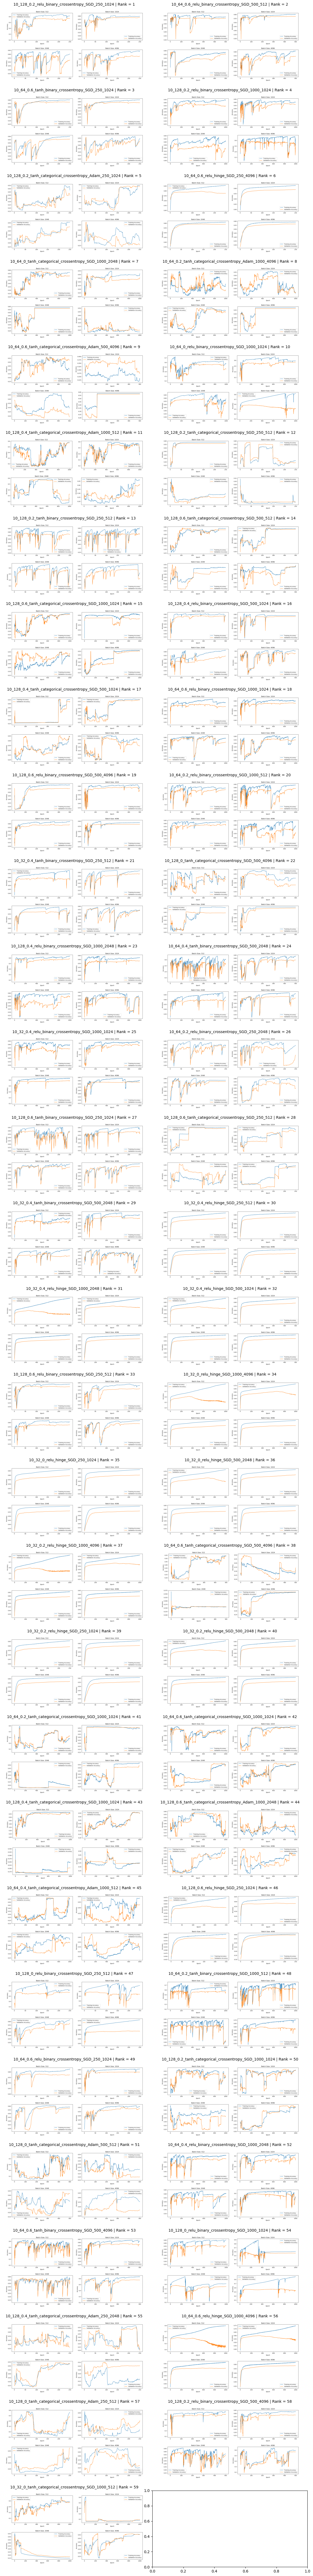

In [14]:
import math
# Define the number of rows and columns
num_rows = math.ceil(len(top_n_unique_model_parameters) / 2)
num_cols = 2

# Calculate the figure size based on the image dimensions
image_width = 1500  # Width of your images
image_height = 800  # Height of your images
fig_width = 12  # Adjust this based on your preference
fig_height = (fig_width / image_width) * image_height * num_rows / num_cols

# Create the figure and subplots
figure, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)

i = 0
for indx, row in top_n_unique_models_df.iterrows():
    row_indx = i // num_cols
    col_indx = i % num_cols
    i += 1
    ax = axs[row_indx, col_indx]
    
    model_parameter = row['model_parameter']
    fig_path = row['batch_size_path']
    img = Image.open(fig_path)
    
    # Display the image at its original aspect ratio
    ax.imshow(img)
    parameter = re.split(r'confusion_matrix_(.*?).png', row['confusion_matrix'])[1]
    ax.set_title(f'{parameter} | Rank = {i}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.savefig(f'{results_path}lstm_script_2_top_n_model_train_val_accuracies.png')
plt.show()

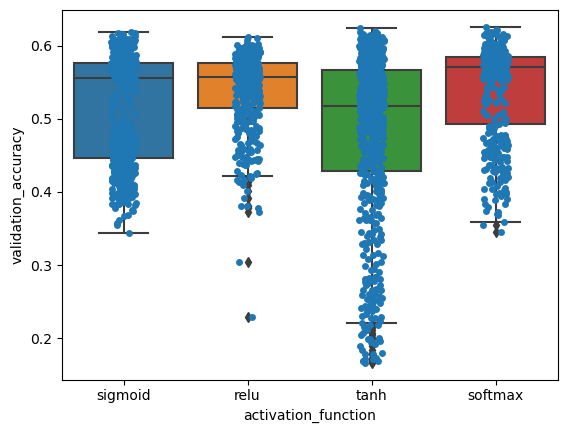

In [15]:
# Box plot for 'validation_accuracy' grouped by 'activation_function'
sns.boxplot(x='activation_function', y='validation_accuracy', data=df)
sns.stripplot(x='activation_function', y='validation_accuracy', data=df)
plt.show()

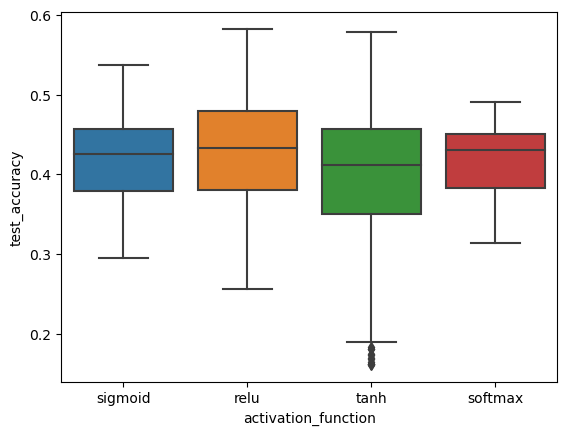

In [16]:
# Box plot for 'validation_accuracy' grouped by 'activation_function'
sns.boxplot(x='activation_function', y='test_accuracy', data=df)
# sns.stripplot(x='activation_function', y='test_accuracy', data=df)
plt.show()